# EPA-1361 Model-Based Decision-Making 

## Final Assignment: Disaggregated Problem Formulation (PF7)

**Instructor:** J.H. Kwakkel & J.A. de Bruijn <br>
**Group 27:** R. Arab, L. Hu, H. Isenia Bustamante, P. Lotfi, K. Konst, M. Nawaz <br>
**Delft University of Technology | Q4 2021** <br>

---

This notebook uses the data from previous assignments and the 'raw' folder. On this basis the data that is used as an input for the model in this assignment is created. <br> 

### Table of Content
1. Imported Libraries
2. Importing Data Files
3. Create Roads
4. Finding the cross-/sideroads of interest
5. Adding the distance and removing the non-N-roads
6. Adding the RMMS-data to the dataframe
7. Add Sourcesinks at beginning and end of each road segment
8. Finishing up the input data

### Run all this before running an individual analysis

In [2]:
import numpy as np
import random
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.5
2.4


In [4]:
# random.seed(3922875)
# for i in range(random.randint(0,5)):
#     print(i)

In [5]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter, Policy, save_results, load_results, Scenario)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.analysis import feature_scoring, prim
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from dike_model_function import DikeNetwork  # @UnresolvedImport
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt

# def sum_over(*args):
#     return sum(args)

In [6]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)



In [7]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
#for unc in dike_model.uncertainties:
    #print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
#for policy in dike_model.levers:
    #print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

In [8]:
policy_0 = Policy("no release", **{l.name:0 for l in dike_model.levers})

In [21]:
# random.seed(3922875)
# n_scenarios = 10
# with MultiprocessingEvaluator(dike_model) as evaluator: 
#     pf2_results = evaluator.perform_experiments(n_scenarios, policy_0)

KeyboardInterrupt: 

# Open exploration

In [7]:
# run with pf 2!!!
# (data is saved so load results i.s.o. running this again)
# DON'T RUN AGAIN!!!
random.seed(3922875)
n_scenarios = 5000
with MultiprocessingEvaluator(dike_model) as evaluator: 
    pf2_results = evaluator.perform_experiments(n_scenarios, policy_0)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 2 scenarios * 1 policies * 1 model(s) = 2 experiments
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [ ]:
#don't run again
save_results((pf2_results), './results/base_exploration_aggregated.tar.gz')

In [41]:
#run to load results
pf2_results = load_results('./results/base_exploration_aggregated.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Katherina\Documents\EPA\Q4\Model-based decision-making\epa1361_open-master\epa1361_open-master\final assignment\results\base_exploration_aggregated.tar.gz


In [42]:
pf2_experiments, pf2_outcomes = pf2_results

#### Pair-scatter plot

[MainProcess/INFO] no time dimension found in results


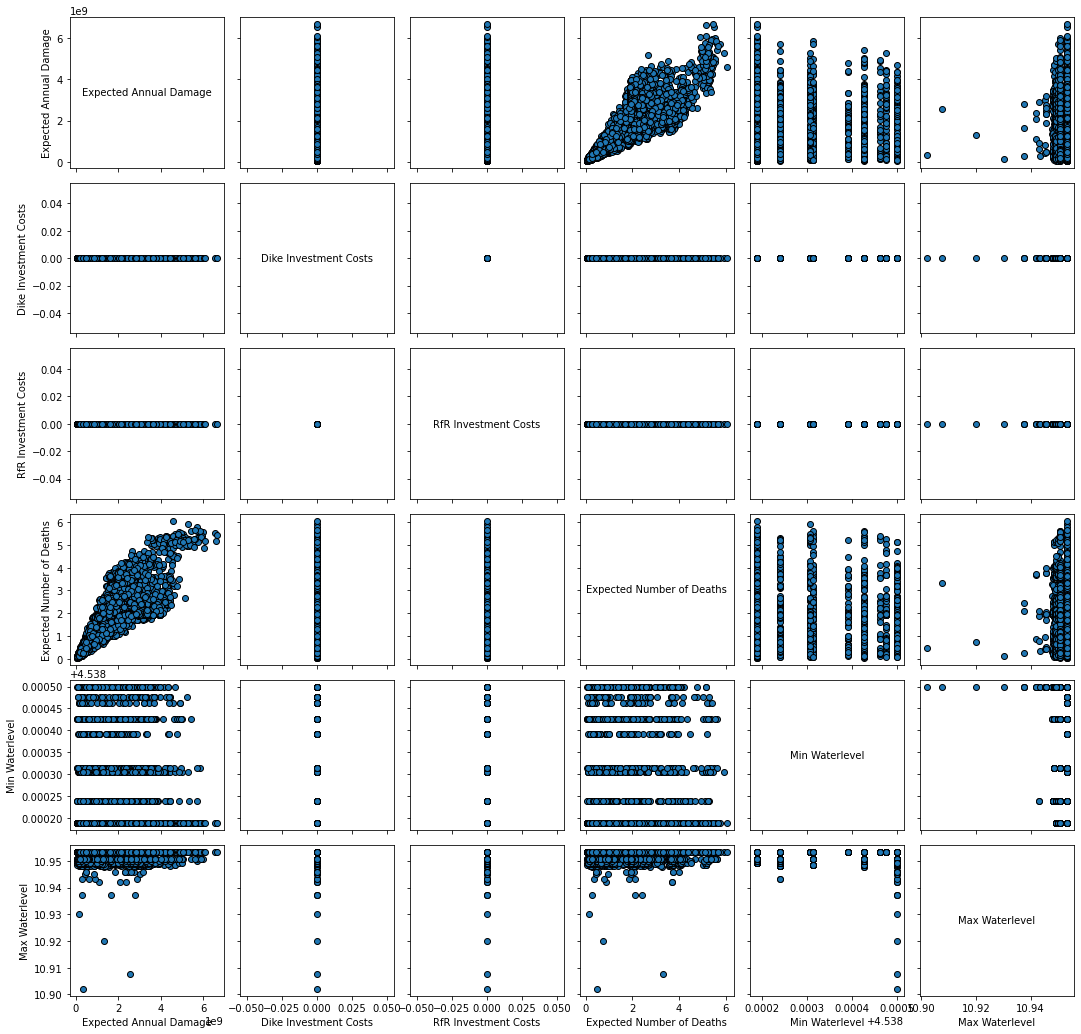

In [9]:
pairs_plotting.pairs_scatter(pf2_experiments, pf2_outcomes)

fig = plt.gcf()
fig.set_size_inches(18,18)

plt.show()

#### Histograms

<function matplotlib.pyplot.show(*args, **kw)>

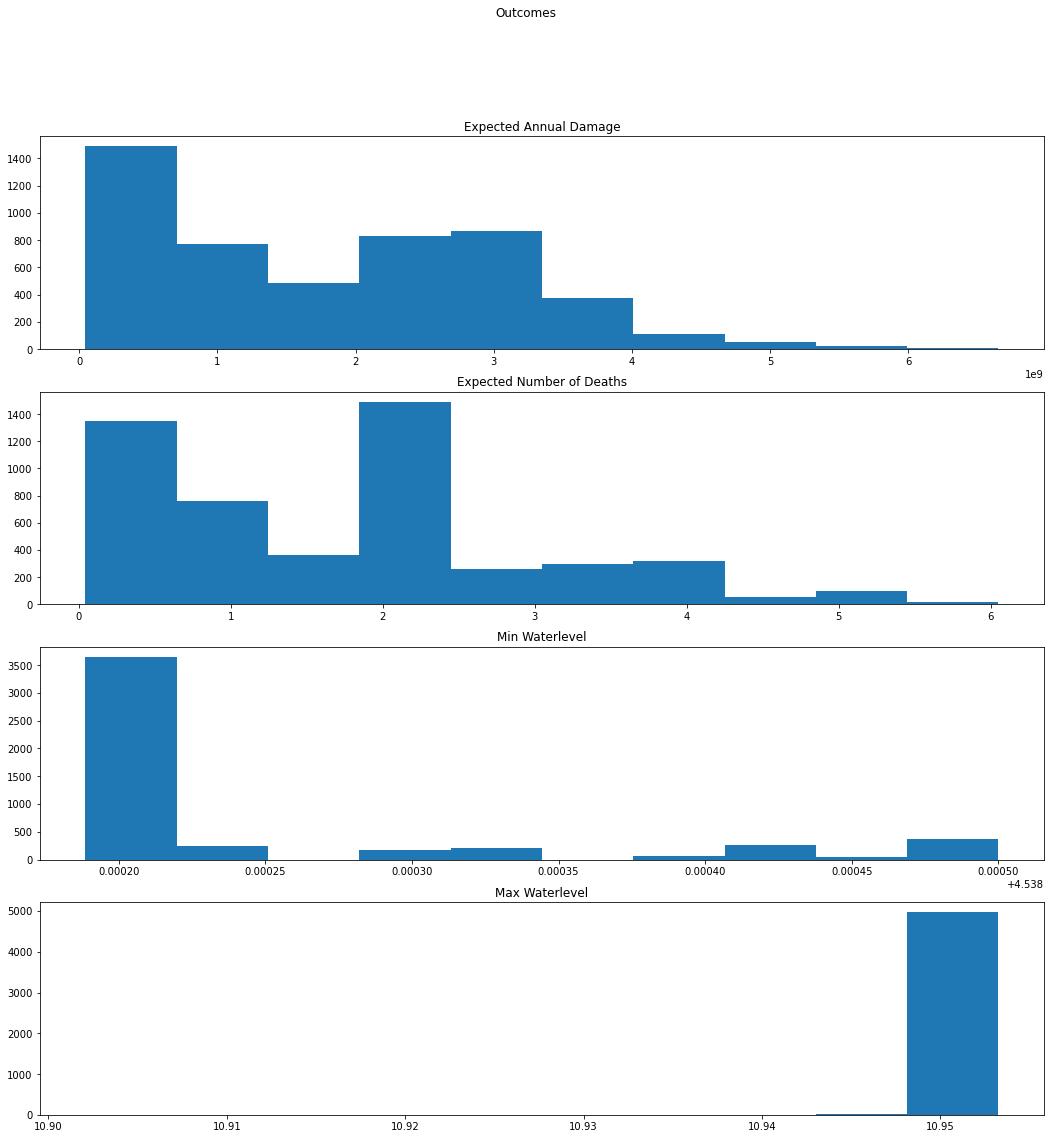

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

fig.suptitle('Outcomes')
fig.set_size_inches(18,18)

ax1.hist(pf2_outcomes['Expected Annual Damage'])
ax1.set_title('Expected Annual Damage')

ax2.hist(pf2_outcomes['Expected Number of Deaths'])
ax2.set_title('Expected Number of Deaths')

ax3.hist(pf2_outcomes['Min Waterlevel'])
ax3.set_title('Min Waterlevel')

ax4.hist(pf2_outcomes['Max Waterlevel'])
ax4.set_title('Max Waterlevel')

plt.show

#### Boxplots

 The median is:  1684490241.1021686
Q1 quantile:  565694050.5974363
Q3 quantile:  2809346224.5996804


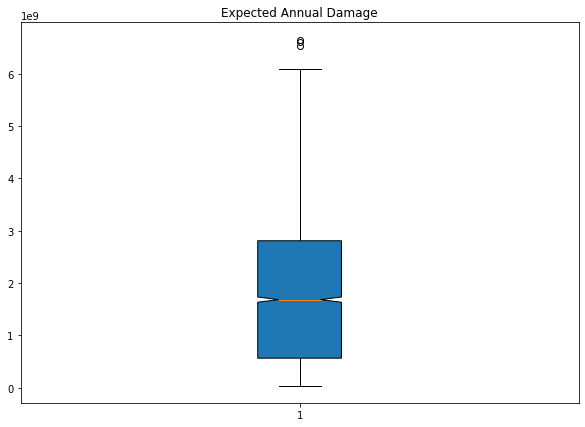

In [12]:
#boxplot for 'Expected Annual Damage'
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(pf2_outcomes['Expected Annual Damage'],  notch=True, patch_artist=True )

print(" The median is: ", np.quantile(pf2_outcomes['Expected Annual Damage'], .50))
print("Q1 quantile: ", np.quantile(pf2_outcomes['Expected Annual Damage'], .25))
print("Q3 quantile: ", np.quantile(pf2_outcomes['Expected Annual Damage'], .75))

plt.title('Expected Annual Damage')
    

# show plot
plt.show()

 The median is:  1.8917856444262948
Q1 quantile:  0.576957690876557
Q3 quantile:  2.1701178844086337


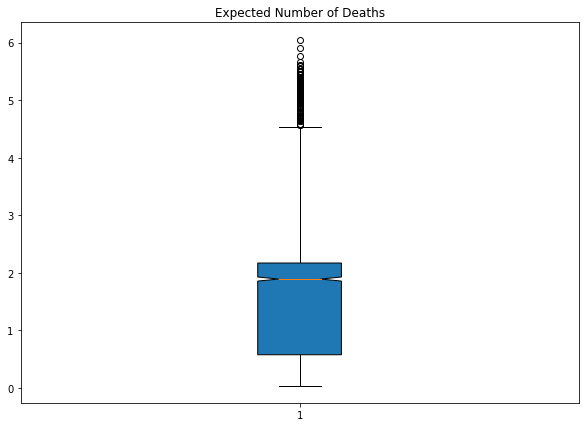

In [13]:
#boxplot for 'Expected Number of Deaths'
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(pf2_outcomes['Expected Number of Deaths'],  notch=True, patch_artist=True )

print(" The median is: ", np.quantile(pf2_outcomes['Expected Number of Deaths'], .50))
print("Q1 quantile: ", np.quantile(pf2_outcomes['Expected Number of Deaths'], .25))
print("Q3 quantile: ", np.quantile(pf2_outcomes['Expected Number of Deaths'], .75))

plt.title('Expected Number of Deaths')
    

# show plot
plt.show()

 The median is:  4.538188602702715
Q1 quantile:  4.538188602702715
Q3 quantile:  4.53824000658094


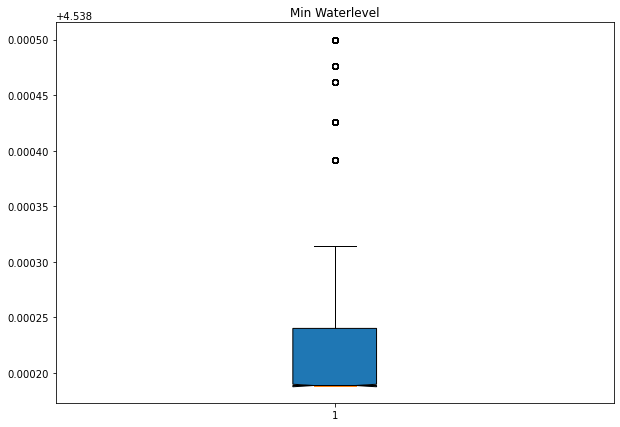

In [14]:
#boxplot for 'Min waterlevel'
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(pf2_outcomes['Min Waterlevel'],  notch=True, patch_artist=True )

print(" The median is: ", np.quantile(pf2_outcomes['Min Waterlevel'], .50))
print("Q1 quantile: ", np.quantile(pf2_outcomes['Min Waterlevel'], .25))
print("Q3 quantile: ", np.quantile(pf2_outcomes['Min Waterlevel'], .75))

plt.title('Min Waterlevel')
    

# show plot
plt.show()

 The median is:  10.953253763115368
Q1 quantile:  10.953253763115368
Q3 quantile:  10.953253763115368


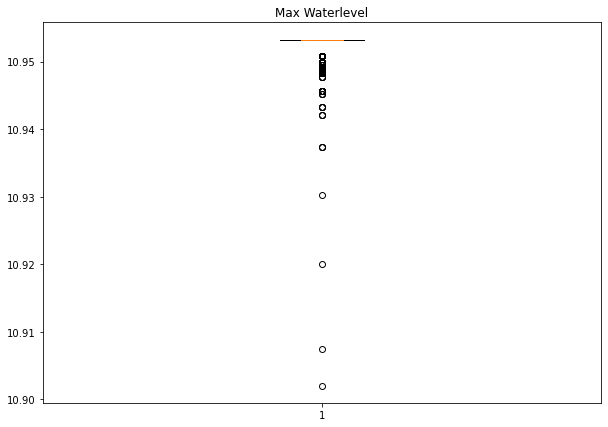

In [15]:
#boxplot for 'Max waterlevel'
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(pf2_outcomes['Max Waterlevel'],  notch=True, patch_artist=True )

print(" The median is: ", np.quantile(pf2_outcomes['Max Waterlevel'], .50))
print("Q1 quantile: ", np.quantile(pf2_outcomes['Max Waterlevel'], .25))
print("Q3 quantile: ", np.quantile(pf2_outcomes['Max Waterlevel'], .75))

plt.title('Max Waterlevel')
    

# show plot
plt.show()

### Worst case scenario --> onderdeel van open exploration

In [12]:
# RUN WITH PF 6 !!!
convergence_metrics = [HyperVolume.from_outcomes(dike_model.outcomes),
                       EpsilonProgress()]

In [ ]:
# RUN WITH PF 6!!!
# but results are saved so DON'T RUN AGAIN!!!

random.seed(3922875)
with MultiprocessingEvaluator(dike_model) as evaluator:
    results, convergence = evaluator.optimize(nfe=8500, searchover='uncertainties', reference = policy_0,
                                    epsilons=[0.05, 0.05, 0.05, 0.05],
                                    convergence=convergence_metrics)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/8500 nfe
[MainProcess/INFO] generation 5: 500/8500 nfe
[MainProcess/INFO] generation 10: 1000/8500 nfe
[MainProcess/INFO] generation 15: 1500/8500 nfe
[MainProcess/INFO] generation 20: 2000/8500 nfe


In [ ]:
#don't run again!
save_results((results, convergence), './results/opt_WCS_results.tar.gz')

In [13]:
opt_WCS = load_results('./results/opt_WCS_results.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Katherina\Documents\EPA\Q4\Model-based decision-making\epa1361_open-master\epa1361_open-master\final assignment\results\opt_WCS_results.tar.gz


In [14]:
opt_WCS_results, opt_WCS_convergence = opt_WCS

In [21]:
opt_WCS_convergence

{'hypervolume': array([0.        , 0.60967882, 0.94516212, 0.69861284, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'epsilon_progress': array([ 0, 14, 37, 46, 51, 53, 56, 57, 57, 58], dtype=int64),
 'nfe': array([   0,  100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100],
       dtype=int64)}

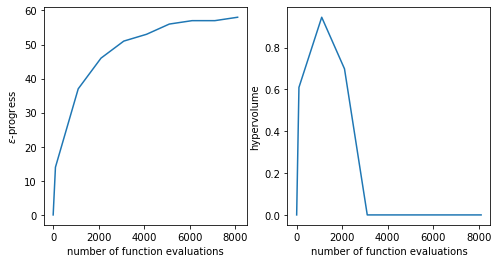

<Figure size 432x288 with 0 Axes>

In [23]:
# figure not saved
# wouldn't recogonize keys for some reason so had to refer to keys in another way
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(opt_WCS_convergence['nfe'], opt_WCS_convergence['epsilon_progress'])
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(opt_WCS_convergence['nfe'], opt_WCS_convergence['hypervolume'])
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()
plt.savefig('./results/opt_WCS_convergence')

In [10]:
# select the columns from the results containing the uncertainties in variable selected
selected = opt_WCS_results.iloc[:,0:19]

In [11]:
# make from the variable selected scenario objects

scenarios = [Scenario({index}, **row) for index, row in selected.iterrows()]
## f is function makes dictionary met index key en row value

In [20]:
# first, select the scenario we are interested in, then
# some scenario inputs are defined as strings with categories, the following code makes them floats
worst_case_scenario = scenarios[1]
for key in worst_case_scenario:
    #print('original', worst_case_scenario[key])
    if type(worst_case_scenario[key]) == str:
            value = worst_case_scenario[key]
            real_value = float(value[-4:-1])
            #print('for', worst_case_scenario[key], 'real_value is', real_value)
            worst_case_scenario[key]=real_value

In [21]:
# policies for each project, given that they are maintained for all 3 time plannings
#base case
base_case = Policy("no release", **{l.name:0 for l in dike_model.levers})
#first project
project_0 = Policy( **{l.name:0 for l in dike_model.levers})
project_0['0_RfR 0'] = 1
project_0['0_RfR 1'] = 1
project_0['0_RfR 2'] = 1
#2nd project
project_1 = Policy( **{l.name:0 for l in dike_model.levers})
project_1['1_RfR 0'] = 1
project_1['1_RfR 1'] = 1
project_1['1_RfR 2'] = 1
#3rd project
project_2 = Policy( **{l.name:0 for l in dike_model.levers})
project_2['2_RfR 0'] = 1
project_2['2_RfR 1'] = 1
project_2['2_RfR 2'] = 1
#4th project
project_3 = Policy( **{l.name:0 for l in dike_model.levers})
project_3['3_RfR 0'] = 1
project_3['3_RfR 1'] = 1
project_3['3_RfR 2'] = 1
#5th project
project_4 = Policy( **{l.name:0 for l in dike_model.levers})
project_4['4_RfR 0'] = 1
project_4['4_RfR 1'] = 1
project_4['4_RfR 2'] = 1
#A.1 dike increase
A_1_DikeIncrease = Policy( **{l.name:0 for l in dike_model.levers})
A_1_DikeIncrease['A.1_DikeIncrease 0'] = 1
A_1_DikeIncrease['A.1_DikeIncrease 1'] = 1
A_1_DikeIncrease['A.1_DikeIncrease 2'] = 1
#A.2 dike increase
A_2_DikeIncrease = Policy( **{l.name:0 for l in dike_model.levers})
A_2_DikeIncrease['A.2_DikeIncrease 0'] = 1
A_2_DikeIncrease['A.2_DikeIncrease 1'] = 1
A_2_DikeIncrease['A.2_DikeIncrease 2'] = 1
#A.3 dike increase
A_3_DikeIncrease = Policy( **{l.name:0 for l in dike_model.levers})
A_3_DikeIncrease['A.3_DikeIncrease 0'] = 1
A_3_DikeIncrease['A.3_DikeIncrease 1'] = 1
A_3_DikeIncrease['A.3_DikeIncrease 2'] = 1
#A.4 dike increase
A_4_DikeIncrease = Policy( **{l.name:0 for l in dike_model.levers})
A_4_DikeIncrease['A.4_DikeIncrease 0'] = 1
A_4_DikeIncrease['A.4_DikeIncrease 1'] = 1
A_4_DikeIncrease['A.4_DikeIncrease 2'] = 1
#A.5 dike increase
A_5_DikeIncrease = Policy( **{l.name:0 for l in dike_model.levers})
A_5_DikeIncrease['A.5_DikeIncrease 0'] = 1
A_5_DikeIncrease['A.5_DikeIncrease 1'] = 1
A_5_DikeIncrease['A.5_DikeIncrease 2'] = 1

In [22]:
policies = [base_case, project_0, project_1, project_2, project_3, project_4, 
            A_1_DikeIncrease, A_2_DikeIncrease, A_3_DikeIncrease, A_4_DikeIncrease, A_5_DikeIncrease ]

In [23]:
# run with pf 2
# results are not saved but it take less than 5min to run this
# also, run it twice with different worst case scenario
random.seed(3922875)
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(worst_case_scenario, policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1 scenarios * 11 policies * 1 model(s) = 11 experiments
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 5 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 7 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 9 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 11 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [24]:
experiments, outcomes_solution2 = results

In [19]:
outcomes_solution1

{'Expected Annual Damage': array([6.83985650e+09, 6.25620568e+09, 6.56934151e+09, 4.56520353e+09,
        4.77074846e+09, 6.44086565e+09, 6.83946457e+09, 6.36566173e+09,
        5.11851596e+09, 6.83516787e+09, 6.83985650e+09]),
 'Dike Investment Costs': array([        0,         0,         0,         0,         0,         0,
        101474517, 118700628,  63002497,  19617742,  77707505]),
 'RfR Investment Costs': array([0.000e+00, 2.538e+08, 6.534e+08, 9.210e+07, 3.636e+08, 7.683e+08,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 'Expected Number of Deaths': array([6.41824839, 6.09370868, 6.2367999 , 3.10420942, 3.633194  ,
        5.80027125, 6.41744876, 6.13387431, 3.75930481, 6.41776215,
        6.41824839]),
 'Min Waterlevel': array([4.5385, 4.5385, 4.5385, 4.5385, 4.1785, 4.5385, 4.5385, 4.5385,
        4.1785, 4.5385, 4.5385]),
 'Max Waterlevel': array([10.97975525, 10.40975525, 10.46975525, 10.97975525, 10.97975525,
        10.97975525, 10.97975525, 10.979755

In [25]:
outcomes_solution2

{'Expected Annual Damage': array([8.74150109e+09, 5.12398827e+09, 5.13562026e+09, 6.41607597e+09,
        7.30204804e+09, 8.24786647e+09, 8.04168788e+09, 8.46877432e+09,
        7.08332923e+09, 8.74150109e+09, 8.74150109e+09]),
 'Dike Investment Costs': array([        0,         0,         0,         0,         0,         0,
        101474517, 118700628,  63002497,  19617742,  77707505]),
 'RfR Investment Costs': array([0.000e+00, 2.538e+08, 6.534e+08, 9.210e+07, 3.636e+08, 7.683e+08,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 'Expected Number of Deaths': array([6.48909131, 4.79862673, 4.80415225, 3.56293999, 4.76730592,
        5.87784473, 6.17333918, 6.35393475, 4.43961195, 6.48909131,
        6.48909131]),
 'Min Waterlevel': array([4.5385, 4.5385, 4.5385, 4.5385, 4.1785, 4.5385, 4.5385, 4.5385,
        4.1785, 4.5385, 4.5385]),
 'Max Waterlevel': array([10.97114329, 10.40114329, 10.46114329, 10.97114329, 10.97114329,
        10.97114329, 10.97114329, 10.971143

### Sensitivity analysis: Extra Trees

#### Aggregated level

In [17]:
BC_aggregated_experiments, BC_aggregated_outcomes = load_results('./results/base_exploration_aggregated.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Katherina\Documents\EPA\Q4\Model-based decision-making\epa1361_open-master\epa1361_open-master\final assignment\results\base_exploration_aggregated.tar.gz


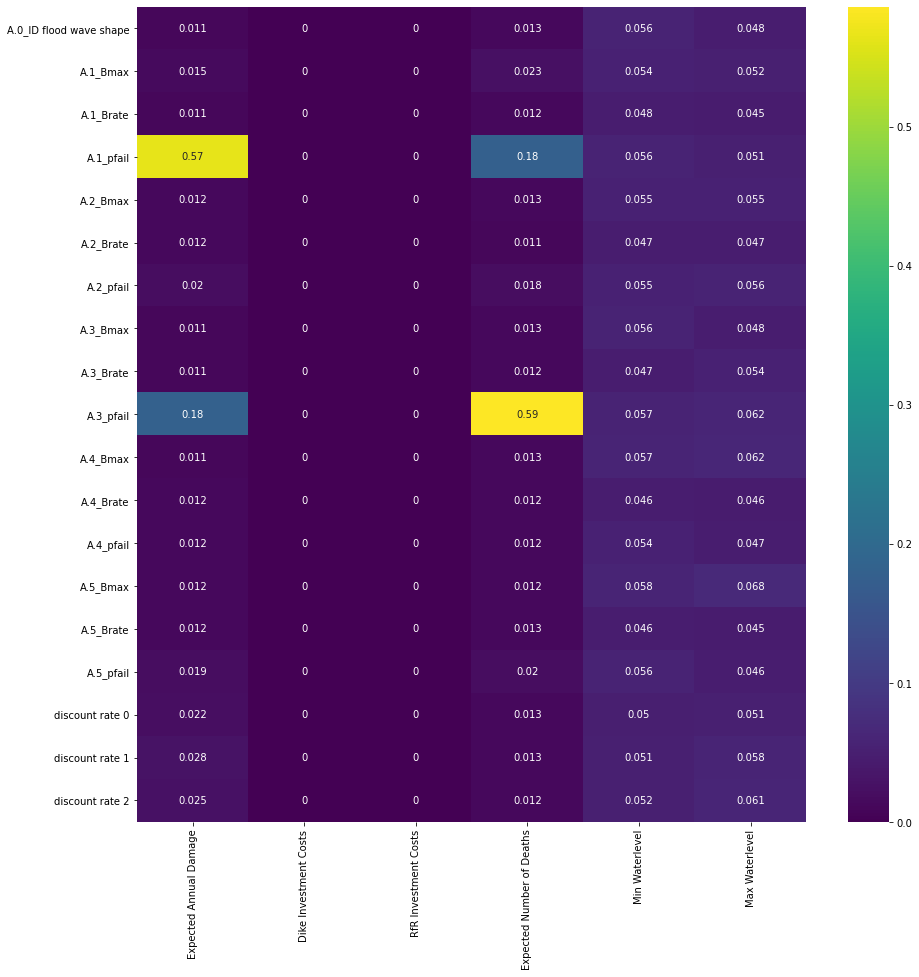

In [18]:
# on open explortion dataset:
# TODO! need this dataset
x = BC_aggregated_experiments.iloc[:,:19]
y = BC_aggregated_outcomes
fig = plt.figure(figsize =(15, 15))
fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)

plt.show()

In [34]:
#validate with different random.seed experiments
def extra_trees (seed):
    random.seed(seed)
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=1000, policies=policy_0)
    experiments, outcomes = results
    cleaned_experiments = experiments.drop(columns=[l.name for l in dike_model.levers])
    for outcome in outcomes: #aanpassen op uitkomsten dict
        outcome_list = outcomes[outcome] #aanpassen op uitkomsten dict
        scores = feature_scoring.get_ex_feature_scores(cleaned_experiments, outcome_list, nr_trees = 1000, max_features=0.6, mode=RuleInductionType.REGRESSION)
        if outcome == 'Expected Annual Damage': #niet nodig
            Damage_scores = scores #niet nodig
            Damage_scores = Damage_scores[0]
            EAD = Damage_scores.T
            EAD = EAD.rename(index={1: 'Expected Annual Damage'})
        elif outcome == 'Min Waterlevel':
            Min_waterscores = scores
            Min_waterscores = Min_waterscores[0]
            MINW = Min_waterscores.T
            MINW = MINW.rename(index={1: 'Min Waterlevel'})
        elif outcome == 'Max Waterlevel': 
            Max_waterscores = scores
            Max_waterscores = Max_waterscores[0]
            MAXW = Max_waterscores.T
            MAXW = MAXW.rename(index={1: 'Max Waterlevel'})
        else: #niet nodig
            Death_scores = scores #niet nodig
            Death_scores = Death_scores[0]
            END = Death_scores.T
            END = END.rename(index={1: 'Expected Number of Deaths'})
    fs_sa = END.append(EAD)
    fs_sa = fs_sa.append(MINW)
    fs_sa = fs_sa.append(MAXW)
    fig = plt.figure(figsize =(18, 10))

    sns.heatmap(fs_sa.T, cmap='viridis', annot=True)

    plt.show()
    return fs_sa

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO]

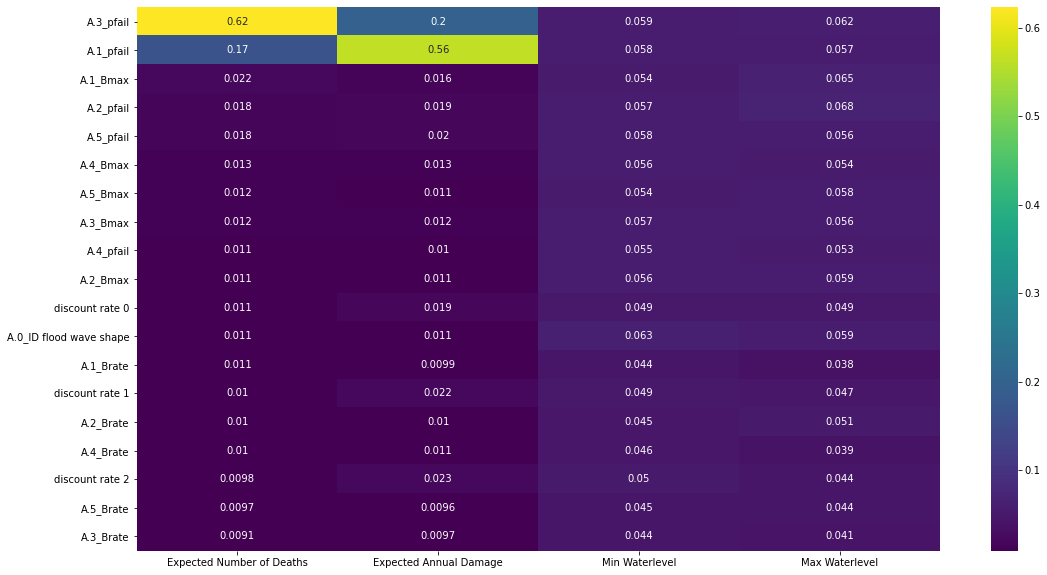

In [35]:
# resultaten niet opgeslagen svp don't run again
fs_sa_3922875 = extra_trees (3922875)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO]

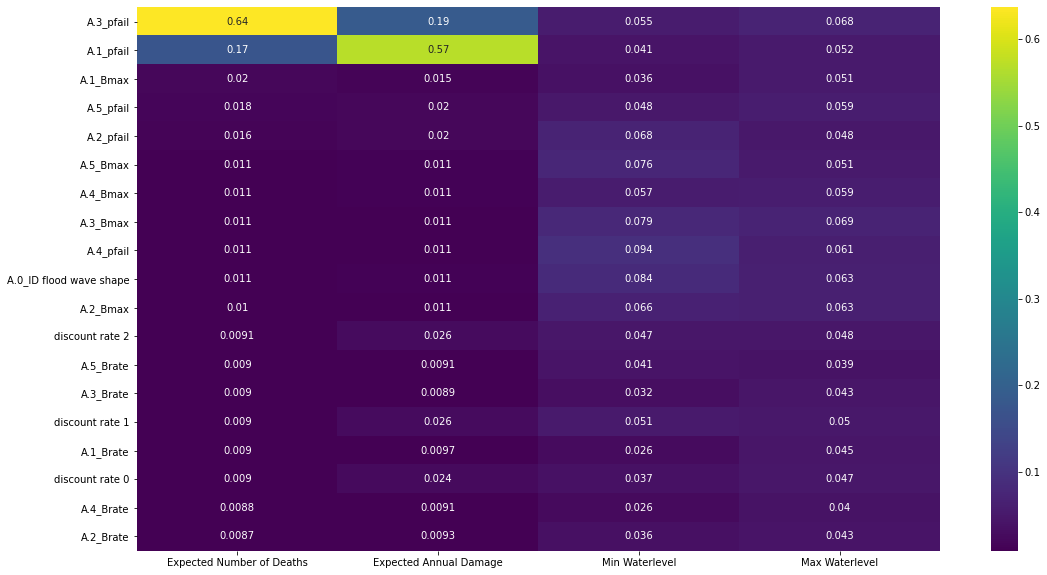

In [36]:
# resultaten niet opgeslagen svp don't run again
fs_sa_3922876 = extra_trees (3922876)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO]

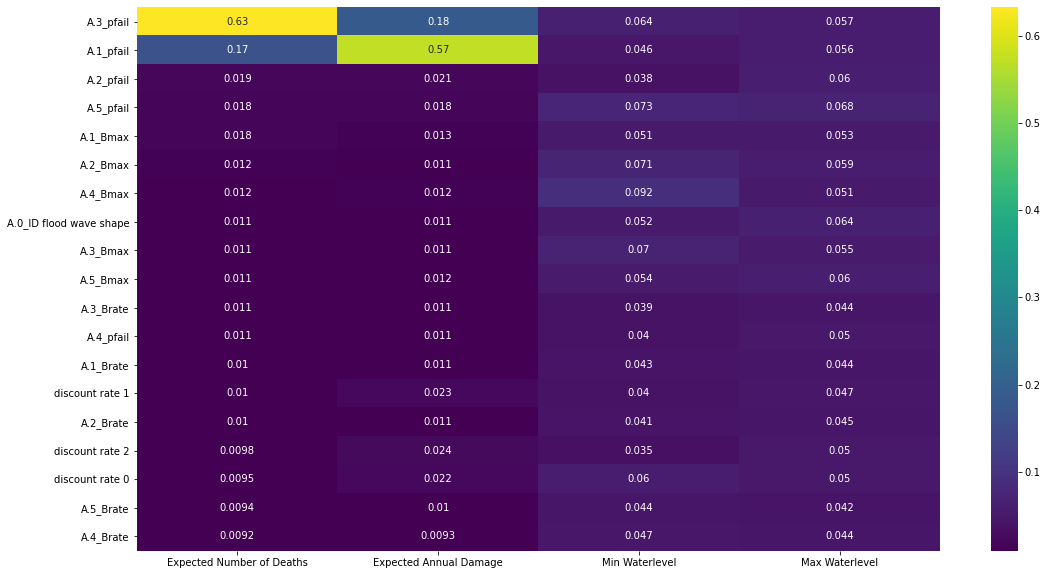

In [37]:
# resultaten niet opgeslagen svp don't run again
fs_sa_3922877 = extra_trees (3922877)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO]

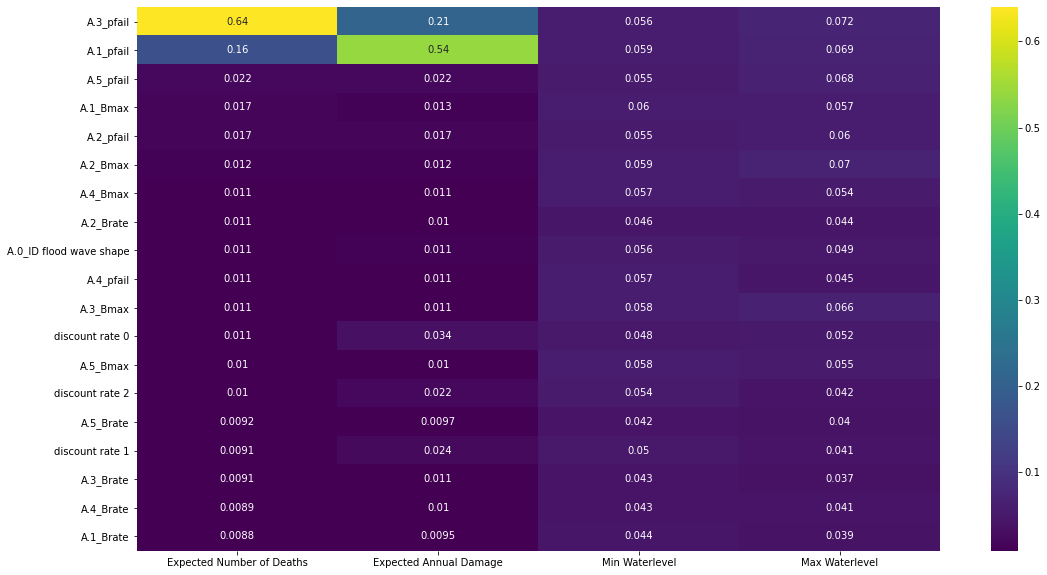

In [38]:
# resultaten niet opgeslagen svp don't run again
fs_sa_8888888 = extra_trees (8888888)

### Scenario discovery

In [7]:
#model run
# met pf 2
# resultaten opgeslagen dus DON'T RUN AGAIN!!!
random.seed(3922875)
n_scenarios = 2000

with MultiprocessingEvaluator(dike_model) as evaluator: 
    pf2_SD_results = evaluator.perform_experiments(n_scenarios, policies=5)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 2000 scenarios * 5 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [8]:
# DONUT RUN AGAIN
save_results((pf2_SD_results), './results/pf2_SD_results.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Katherina\Documents\EPA\Q4\Model-based decision-making\epa1361_open-master\epa1361_open-master\final assignment\results\pf2_SD_results.tar.gz


In [10]:
pf2_SD_results = load_results('./results/pf2_SD_results.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Katherina\Documents\EPA\Q4\Model-based decision-making\epa1361_open-master\epa1361_open-master\final assignment\results\pf2_SD_results.tar.gz


In [11]:
pf2_SD_experiments, pf2_SD_outcomes = pf2_SD_results

#### vanaf hier klopt code niet meer

In [9]:
#Read the data of Rozenberg et al (2014) into a dataframe

Dike_Investment_Costs = pd.read_csv("./results/pf2_SD_results_csv/Dike Investment Costs.csv", header = None, names = ["Dike_Investment_Costs"])

Expected_Annual_Damage = pd.read_csv("results/pf2_SD_results_csv/Expected Annual Damage.csv", header = None, names = ["Annual_Damage"])

Expected_Number_Deaths = pd.read_csv("results/pf2_SD_results_csv/Expected Number of Deaths.csv", header = None, names = ["Number_of_Deaths"])

RfR_Investment_Costs = pd.read_csv("results/pf2_SD_results_csv/RfR Investment Costs.csv", header = None, names = ["RfR_Investment_Costs"])

Max_Waterlevel = pd.read_csv("results/pf2_SD_results_csv/Max Waterlevel.csv", header = None, names = ["Max_Waterlevel"])

Min_Waterlevel = pd.read_csv("results/pf2_SD_results_csv/Min Waterlevel.csv", header = None, names = ["Min_Waterlevel"])

Experiments =  pd.read_csv("results/pf2_SD_results_csv/experiments.csv")

In [10]:
cleaned_experiments= Experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)

In [11]:
Dike_Investment_Costs['Constraints']= Dike_Investment_Costs.Dike_Investment_Costs.apply(lambda x:1 if x <= Dike_Investment_Costs["Dike_Investment_Costs"].mean() else 0)
Expected_Annual_Damage['Constraints']= Expected_Annual_Damage.Annual_Damage.apply(lambda x:1 if x <= Expected_Annual_Damage["Annual_Damage"].median() else 0)
Expected_Number_Deaths['Constraints']= Expected_Number_Deaths.Number_of_Deaths.apply(lambda x:1 if x <= Expected_Number_Deaths["Number_of_Deaths"].mean() else 0)
RfR_Investment_Costs['Constraints']= RfR_Investment_Costs.RfR_Investment_Costs.apply(lambda x:1 if x <= RfR_Investment_Costs["RfR_Investment_Costs"].mean() else 0)
Max_Waterlevel['Constraints']= Max_Waterlevel.Max_Waterlevel.apply(lambda x:1 if x <= Max_Waterlevel["Max_Waterlevel"].mean() else 0)
Min_Waterlevel['Constraints']= Min_Waterlevel.Min_Waterlevel.apply(lambda x:1 if x >= Min_Waterlevel["Min_Waterlevel"].mean() else 0)

In [12]:
Dike_Investment_Costs_Constraints = Dike_Investment_Costs.iloc[:,1]

Expected_Annual_Damage_Constraints = Expected_Annual_Damage.iloc[:,1]

Expected_Number_Deaths_Constraints = Expected_Number_Deaths.iloc[:,1]

RfR_Investment_Costs_Constraints = RfR_Investment_Costs.iloc[:,1]

Max_Waterlevel_Constraints = Max_Waterlevel.iloc[:,1]

Min_Waterlevel_Constraints = Min_Waterlevel.iloc[:,1]

In [13]:
def apply_prim(box_number, y = Expected_Annual_Damage, threshold = 0.8, peel_alpha=0.05):
    prim_alg = prim.Prim(x = cleaned_experiments, y=y, threshold=threshold, peel_alpha=peel_alpha)
    box = prim_alg.find_box() 
    
    #Visualize the trade off between coverage and density
    box.show_tradeoff()
    plot1 = plt.show()
    plot2 = box.inspect(style='graph')
    plot2.set_size_inches(18,18)
    
    #Plot the point of box 2 in a pairs_scatter plot
    box.select(box_number)
    fig = box.show_pairs_scatter()
    plot3 = plt.show()
    return (plot1, plot2) # plot3)

#### Dike investment costs

In [ ]:
apply_prim(1, y = Dike_Investment_Costs_Constraints, threshold = 0.4)

#### Expected Annual Damage

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 5000 cases of interest
[MainProcess/INFO] mean: 0.9, mass: 0.051, coverage: 0.0918, density: 0.9 restricted_dimensions: 8


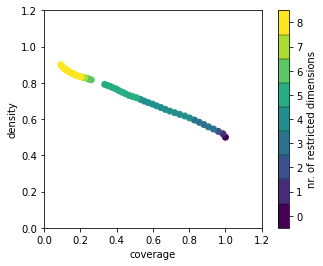

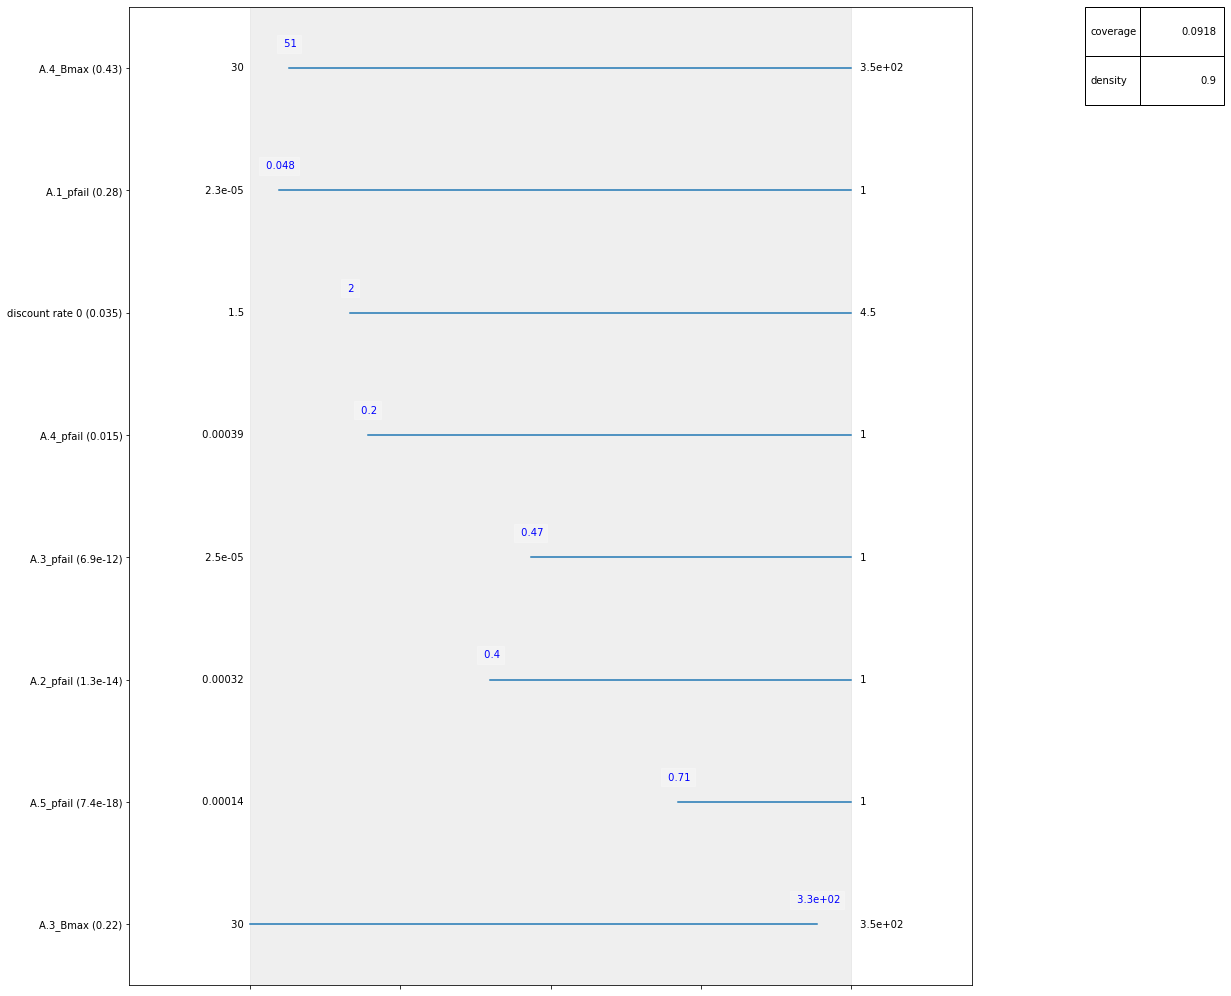

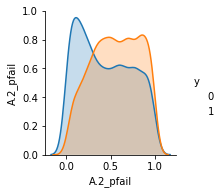

(None, <Figure size 1296x1296 with 1 Axes>)

In [38]:
apply_prim(1, y = Expected_Annual_Damage_Constraints, threshold = 0.8)

#### Expected_Number_Deaths_Constraints

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 7900 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.072, coverage: 0.09113924050632911, density: 1.0 restricted_dimensions: 9


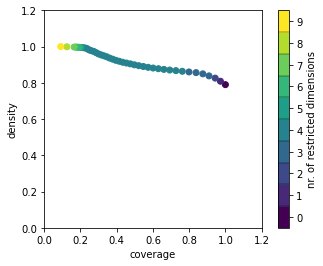

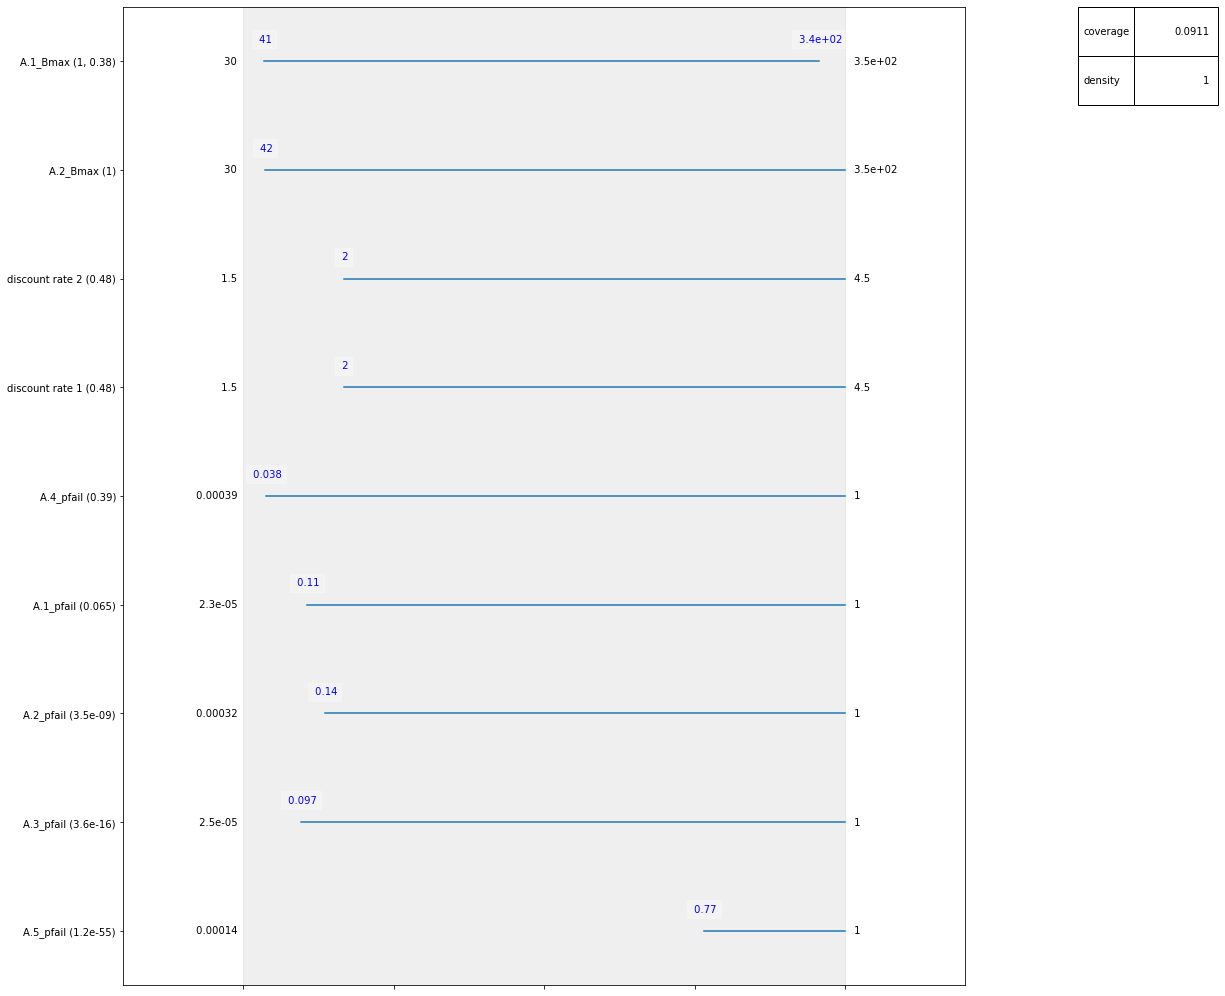

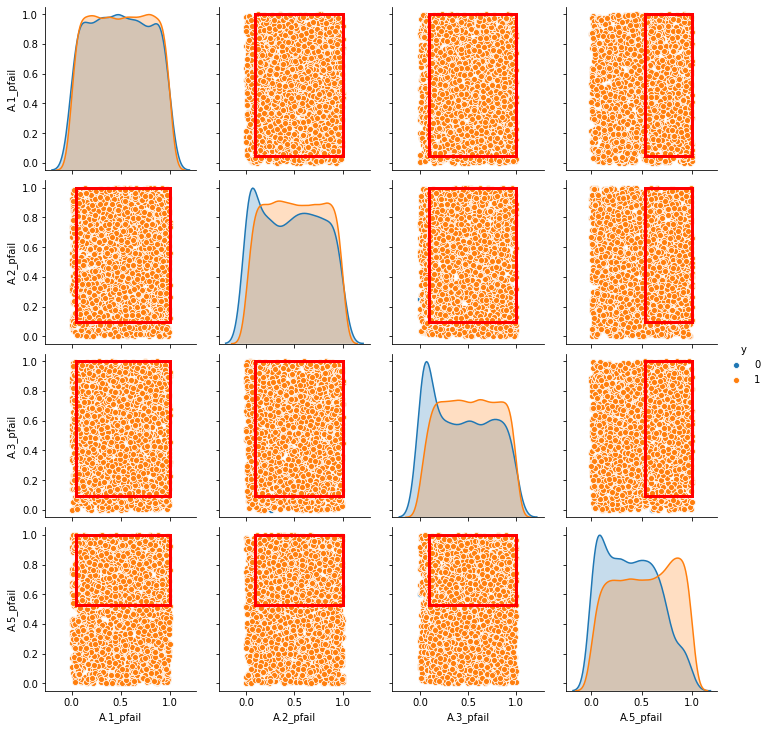

(None, <Figure size 1296x1296 with 1 Axes>)

In [33]:
apply_prim(20, y =Expected_Number_Deaths_Constraints , threshold = 0.8)

#### RfR_Investment_Costs

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 4000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.4, coverage: 1.0, density: 1.0 restricted_dimensions: 1


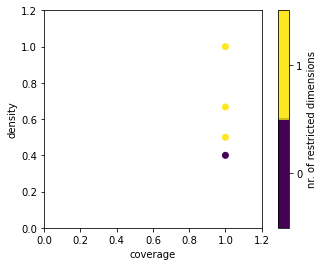

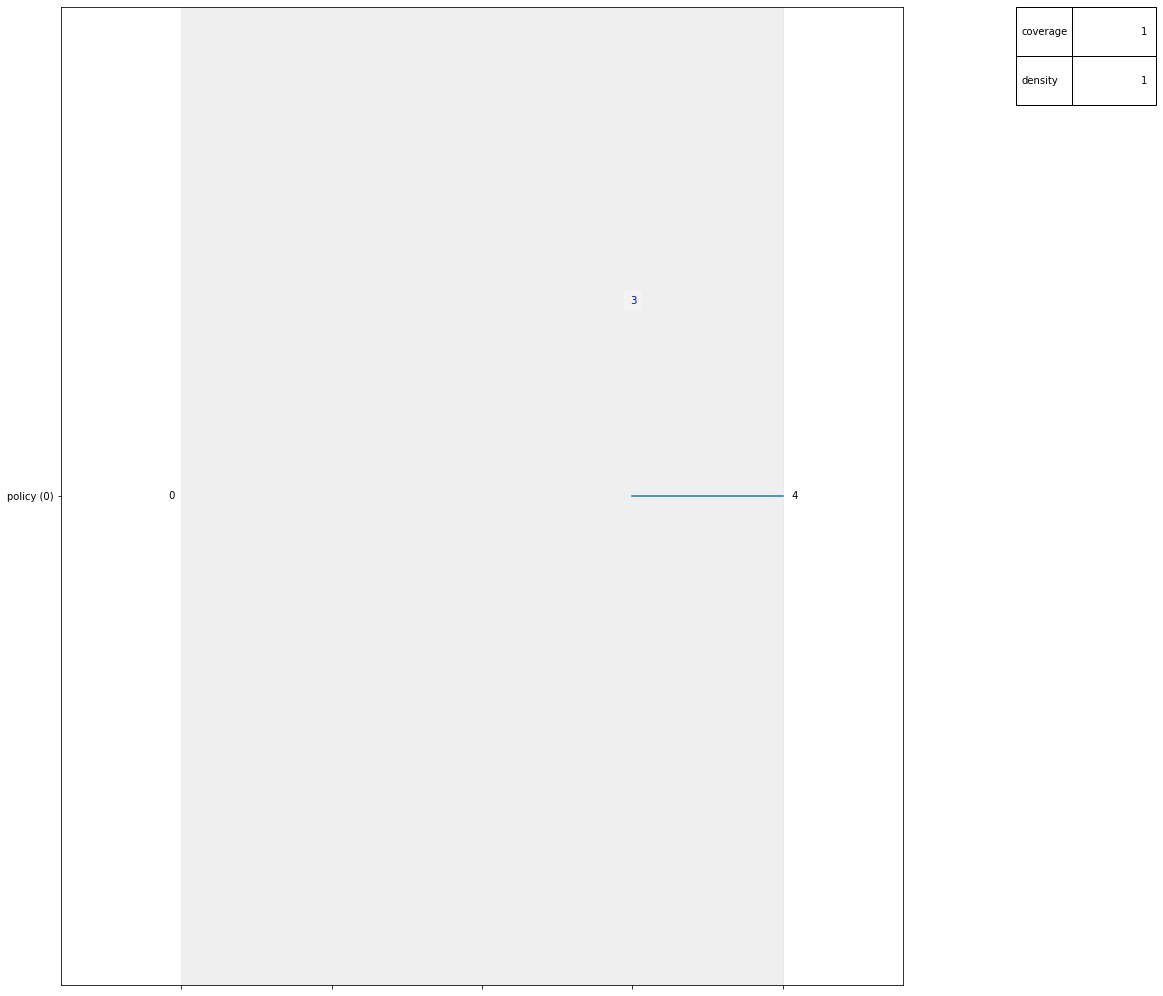

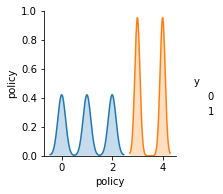

(None, <Figure size 1296x1296 with 1 Axes>)

In [34]:
apply_prim(1, y =RfR_Investment_Costs_Constraints , threshold = 0.8)

#### Max Waterlevel

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 6059 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.6, coverage: 0.9902624195411784, density: 1.0 restricted_dimensions: 1


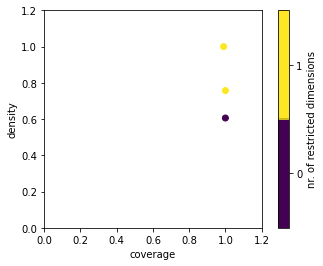

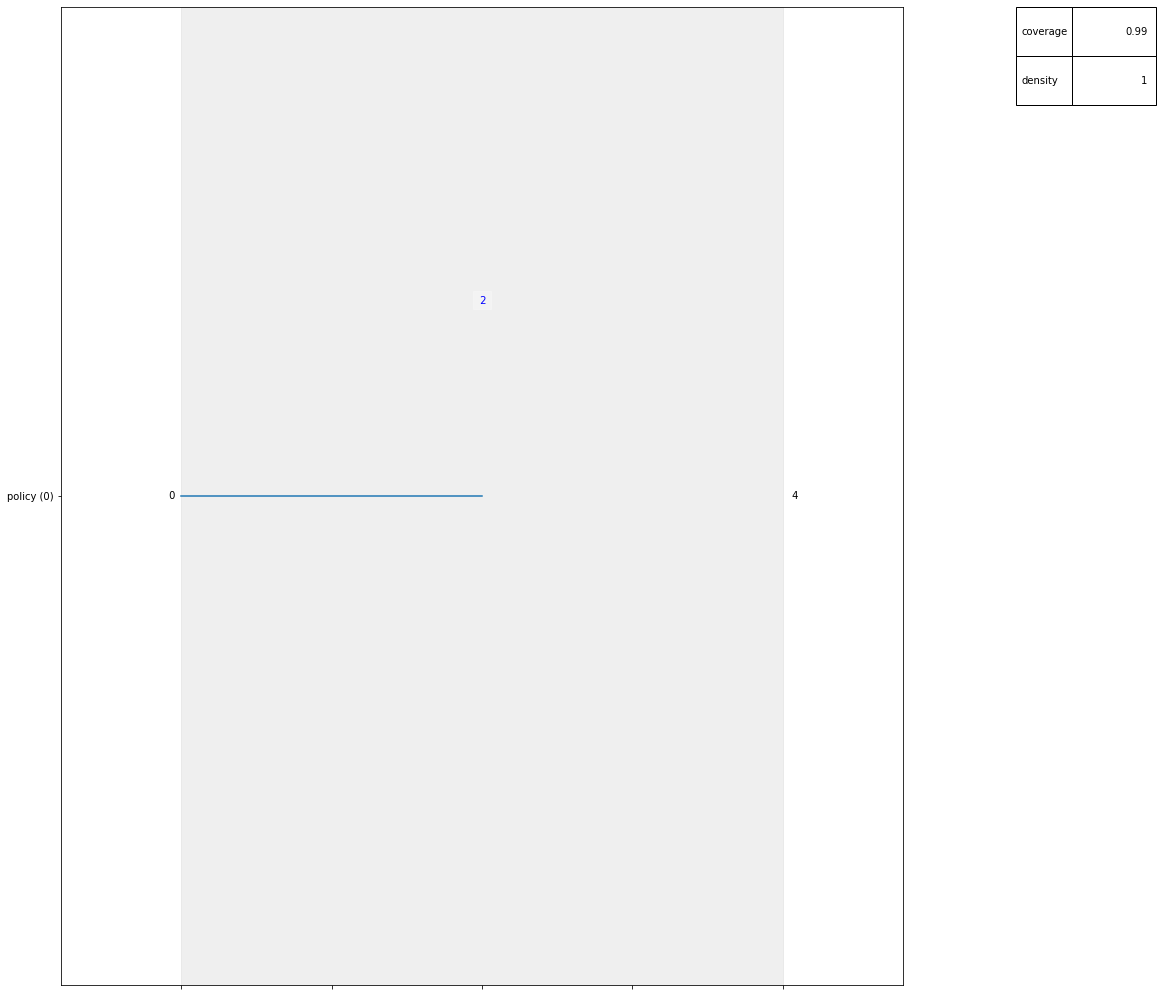

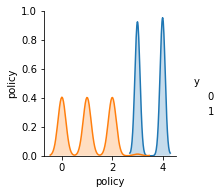

(None, <Figure size 1296x1296 with 1 Axes>)

In [35]:
apply_prim(1, y =Max_Waterlevel_Constraints, threshold = 0.8)

#### Min Waterlevel

In [1]:
apply_prim(1, y =Min_Waterlevel_Constraints, threshold = 0.8)

NameError: name 'apply_prim' is not defined

## Multi Scenario MORDM

--> robustness function opstellen per uitkomst (en daarmee nieuwe pf)
--> dan maximalisatie functie runnen:)
--> met lijst van scenario-objects
(-->) evaluate under uncertainty?

uitkomsten:
* deaths --> 
* damage --> 
* RfR kosten --> min regret
* dijk kosten --> min regret
* min waterlevel --> 
* max waterlevel --> 